In [38]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [39]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
df.Gender = le.fit_transform(df[['Gender']])

In [42]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [43]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

# EDA

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns


In [45]:
x = df['Gender']
y = df['Weight']



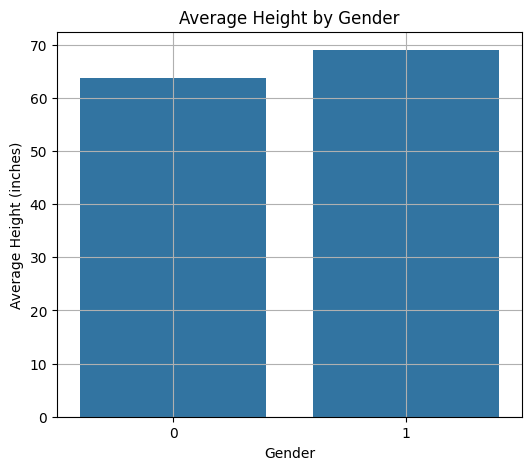

In [46]:
plt.figure(figsize=(6, 5))
sns.barplot(x ='Gender', y ='Height', data=df, ci=None)
plt.title('Average Height by Gender')
plt.ylabel('Average Height (inches)')
plt.xlabel('Gender')
plt.grid(True)
plt.show()

# Least Squared Linear Regression

In [47]:
X = df[['Gender', 'Height']]
Y = df['Weight']

In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.3, random_state = 42)
xtrain.head()

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308


# Regression Problem

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [50]:
y_train_predict = model.predict(xtrain)
y_test_predict = model.predict(xtest)

train_accuracy = r2_score(ytrain, y_train_predict)
test_accuracy = r2_score(ytest, y_test_predict)

mse_test = mean_squared_error(ytest, y_test_predict)

In [51]:
train_accuracy


0.8973793060969246

In [52]:
test_accuracy


0.9059112424422658

In [53]:
mse_test

96.83734437830613

# Classification Problem

In [54]:
x = df[['Gender','Height']]
y = df['Weight']


In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)



In [56]:
knn_model.fit(xtrain, ytrain)

KNeighborsRegressor()

In [57]:

y_train_pred_knn = knn_model.predict(xtrain)
y_test_pred_knn = knn_model.predict(xtest)

train_acc_knn = r2_score(ytrain, y_train_pred_knn)
test_acc_knn = r2_score(ytest, y_test_pred_knn)
mse_knn = mean_squared_error(ytest, y_test_pred_knn)

In [58]:
train_acc_knn

0.9172142723737918

In [59]:
test_acc_knn

0.8821086423439015

In [60]:
mse_knn

121.33528273624482

# Comparison of Linear Rgeression and KNN Regressor

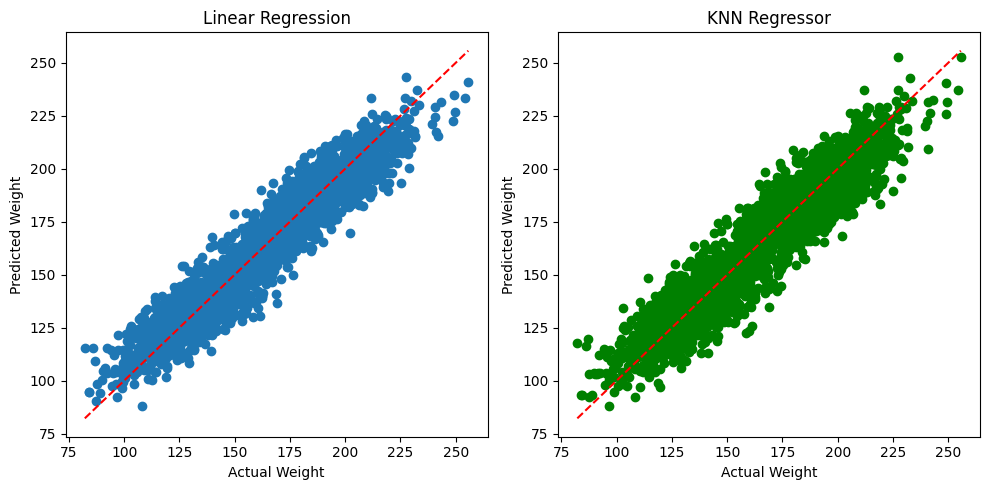

In [61]:
#plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(ytest, y_test_predict)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.title('Linear Regression')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')

plt.subplot(1, 2, 2)
plt.scatter(ytest, y_test_pred_knn, color='green')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.title('KNN Regressor')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')

plt.tight_layout()
plt.show()


# Comparison of Logistic Rgeression and KNN Classifier

In [70]:
#plot


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [71]:
X = df[['Height', 'Weight']]   # Input features
y = df['Gender'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [72]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [75]:
accuracy_log_reg

0.9185820023373588

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune this
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [76]:
accuracy_knn

0.901441371250487